# Custom Seeds with the WaterShed Algorithm

Previously we did a lot of work with OpenCV to set Markers to provide seeds to the Watershed Algorithm. But what if we just provide seeds ourselves, manually? Let's try it out!

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pyimagesearch.imageutils import display

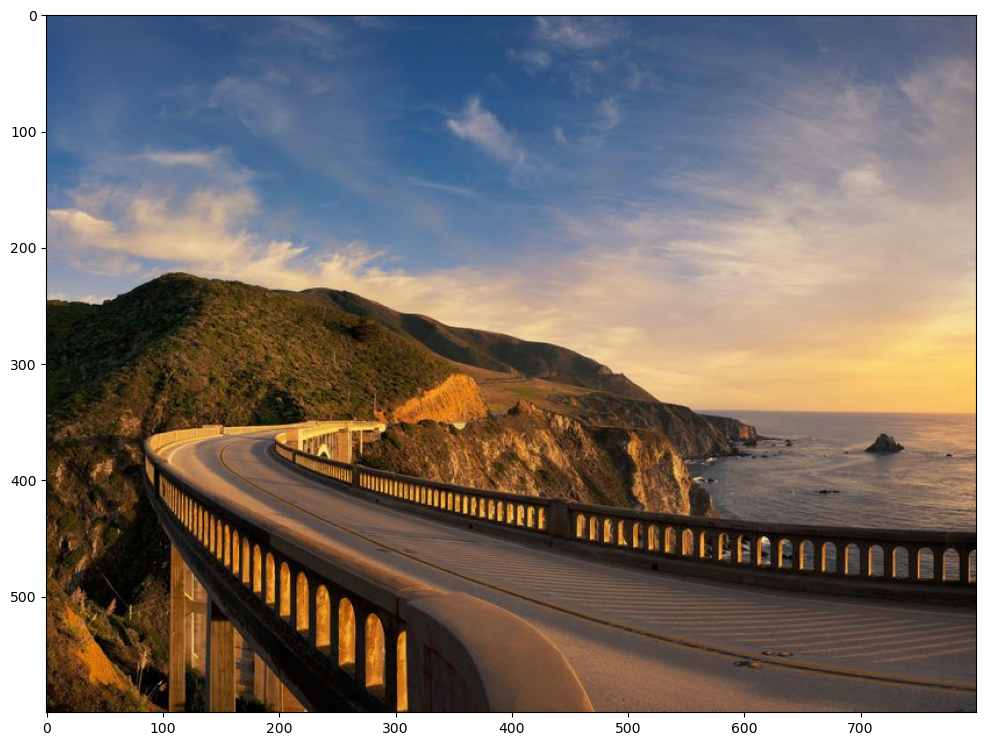

In [2]:
road = cv2.imread('images/road_image.jpg')
road_copy = np.copy(road)
display(road_copy)

In [3]:
print(road.shape)
print(road.shape[:2])

# Creating black images for the results to be drawn
marker_image = np.zeros(road.shape[:2],dtype=np.int32)
segments = np.zeros(road.shape, dtype=np.uint8)
print(segments.shape)

# Default settings
n_markers = 10 # Numbers 0-9
current_marker = 1
marks_updated = False

(600, 800, 3)
(600, 800)
(600, 800, 3)


In [4]:
# Create colors a list of collor to be used in the markers
# For that we use matplotlib collor maps table10 https://matplotlib.org/examples/color/colormaps_reference.html
from matplotlib import cm

# Returns (R,G,B,Alpha) we only need RGB values
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

# One color for each single digit
colors = []
for i in range(n_markers):
    colors.append(create_rgb(i))

In [5]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True


In [6]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    if k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        continue
    # If a number 0-9 is chosen index the color
    if k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()